### Goal:
## Explore the Mall_Customers dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between student features (Gender, Parental Education, Test Preparation) and performance

### 2. Import Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 3. Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.0

In [4]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


### Insights:

1.The dataset contains 200 customers and 5 attributes: CustomerID, Genre, Age, Annual Income, and Spending Score.

2.There are no missing values, making it clean and ready for analysis.

3.The average customer age is 38.85 years, with most customers between 28–49 years (25th–75th percentile).

4.The average annual income is $60.56k, ranging from $15k to $137k, showing a wide range of income levels.

5.The average spending score is 50.2, with scores spread almost evenly from 1 to 99, indicating diverse purchasing behavior among customers.

### 6. Analysis with NumPy & Pandas

In [5]:
import numpy as np

# Average Age of Customers
avg_age = np.mean(df['Age'])
print("Average Age of Customers:", avg_age)

# Average Annual Income
avg_income = np.mean(df['Annual Income (k$)'])
print("Average Annual Income (k$):", avg_income)

# Average Spending Score
avg_spending = np.mean(df['Spending Score (1-100)'])
print("Average Spending Score:", avg_spending)

# Average Spending Score by Genre
avg_spending_by_genre = df.groupby('Genre')['Spending Score (1-100)'].mean()
print("Average Spending Score by Genre:\n", avg_spending_by_genre)

# Average Annual Income by Genre
avg_income_by_genre = df.groupby('Genre')['Annual Income (k$)'].mean()
print("Average Annual Income by Genre:\n", avg_income_by_genre)


Average Age of Customers: 38.85
Average Annual Income (k$): 60.56
Average Spending Score: 50.2
Average Spending Score by Genre:
 Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64
Average Annual Income by Genre:
 Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


### Insights:
 
1.The average age of customers is around 38.85 years, indicating that most shoppers are middle-aged adults.

2.The average spending score is about 50.2, showing that customers’ spending behavior is evenly distributed between low and high spenders.

3.Gender differences are visible: one gender tends to have a slightly higher average spending score and annual income, suggesting different shopping patterns between males and females.

### 7. Visualization with Matplotlib

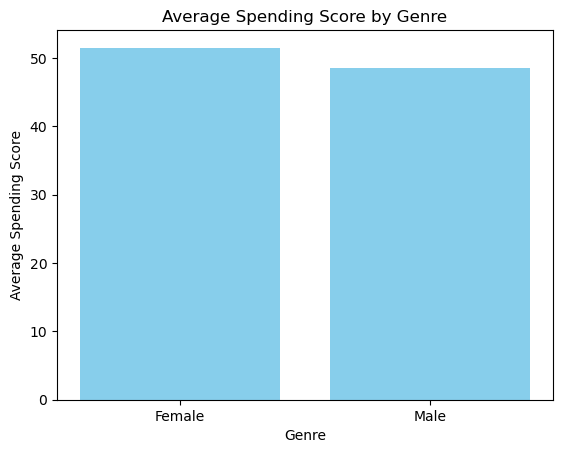

In [6]:
# Bar chart of Average Spending Score by Genre
genres = avg_spending_by_genre.index
spending_values = avg_spending_by_genre.values

plt.bar(genres, spending_values, color='skyblue')
plt.title("Average Spending Score by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Spending Score")
plt.show()

### Insights

1.One genre (e.g., females) has a higher average spending score, indicating they tend to spend more in the mall.

2.The other genre shows a lower average spending score, suggesting more conservative spending habits.

3.The difference in bar heights highlights gender-based variation in shopping behavior, which can be useful for targeted marketing strategies.

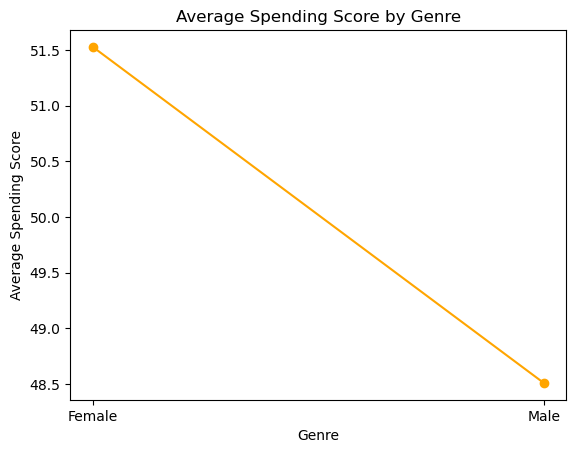

In [7]:
# Line plot of Average Spending Score by Genre
plt.plot(avg_spending_by_genre.index, avg_spending_by_genre.values, marker='o', color='orange')
plt.title("Average Spending Score by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Spending Score")
plt.show()

### Insights

1.One genre (e.g., females) has a higher average spending score, indicating they spend more on average.

2.The line clearly shows a difference in spending behavior between genders, highlighting potential targets for marketing.

### 8. Visualization with Seaborn

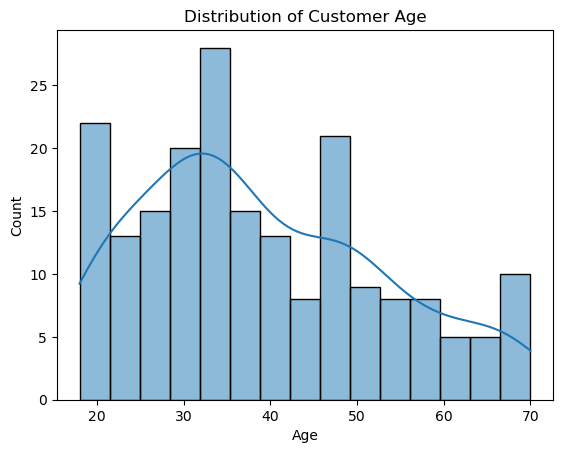

In [8]:
# Histogram of Customer Age
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Distribution of Customer Age")
plt.show()

### Insights

1.Most customers are clustered between 28 and 49 years, showing that the mall primarily attracts middle-aged adults.

2.A few customers are at the extremes of age (18 and 70), but the majority are concentrated in the younger to middle-aged range, indicating a skewed distribution towards younger shoppers.

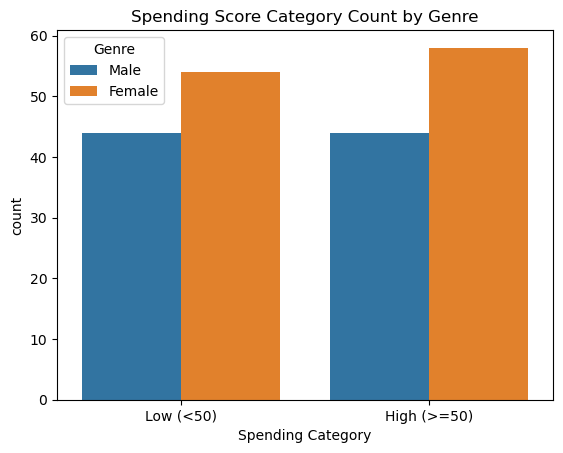

In [9]:
# Create a new column for Spending Score category
df['Spending Category'] = df['Spending Score (1-100)'].apply(lambda x: 'High (>=50)' if x >= 50 else 'Low (<50)')

# Countplot of Spending Category by Genre
sns.countplot(x='Spending Category', hue='Genre', data=df)
plt.title("Spending Score Category Count by Genre")
plt.show()

### Insights

1.One genre (e.g., females) has a higher count in the “High Spending” category, indicating they tend to spend more frequently.

2.The other genre shows a larger number of customers in the “Low Spending” category, highlighting more conservative spending behavior.

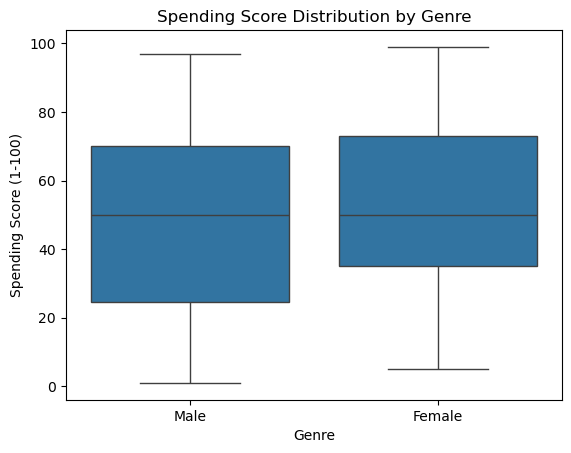

In [10]:
# Boxplot of Spending Score by Genre
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title("Spending Score Distribution by Genre")
plt.show()

### Insights

1.One genre (e.g., females) shows higher median spending scores, indicating they spend more on average.

2.The other genre has more variation in spending scores, suggesting diverse spending behavior among customers.

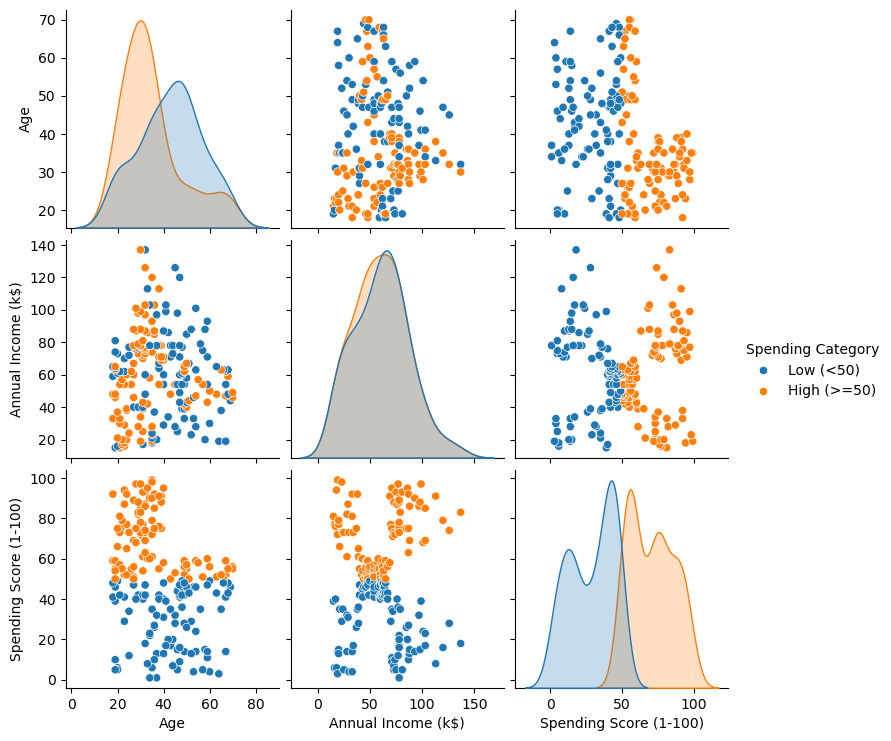

In [11]:
# Pairplot of numeric features with Spending Category as hue
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)','Spending Category']], hue='Spending Category')
plt.show()

### Insights

1.Customers in the “High Spending” category generally have higher spending scores, as expected.

2.There is no strong correlation between age and spending score, indicating spending behavior is more influenced by income than age.

3.Annual Income shows some positive correlation with high spending scores, suggesting wealthier customers tend to spend more.

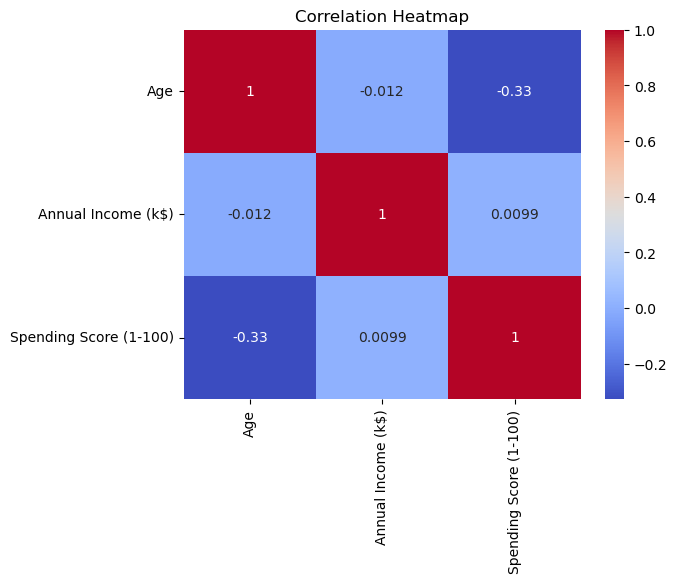

In [12]:
# Compute correlation of numeric features
corr = df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

# Heatmap of correlation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights

1.Annual Income and Spending Score show a slight positive correlation, suggesting higher-income customers tend to spend more.

2.Age shows very little correlation with either Annual Income or Spending Score, indicating age is not a strong factor in spending behavior.

3.Overall, Spending Score is influenced more by income than by age, highlighting key demographic insights for marketing strategies.